# Pandas教程

### 2018七月在线 机器学习集训营 julyedu.com
by 褚则伟 zeweichu@gmail.com

pandas是一个专门用于数据分析的python library

## [Pandas](http://pandas.pydata.org/)简介
- python数据分析library
- 基于numpy (对ndarray的操作)
- 有一种用python做Excel/SQL/R的感觉

## 目录
- Series
- DataFrame
- Index
- 文件读写

## 数据结构Series

### 2018七月在线 机器学习集训营 julyedu.com

### 构造和初始化Series

In [139]:
import pandas as pd
import numpy as np

Series是一个一维的数据结构，下面是一些初始化Series的方法。

In [140]:
s = pd.Series([7, "Beijing", 2.17, 3.1415926, "Happy Birthday"])
s

0                 7
1           Beijing
2              2.17
3           3.14159
4    Happy Birthday
dtype: object

In [141]:
l = [7, "Beijing", 2.17, 3.1415926, "Happy Birthday"]
l

[7, 'Beijing', 2.17, 3.1415926, 'Happy Birthday']

In [142]:
s[1:3]

1    Beijing
2       2.17
dtype: object

pandas会默认用0到n-1来作为Series的index，但是我们也可以自己指定index。index我们可以把它理解为dict里面的key。

In [143]:
s = pd.Series([7, "Beijing", 2.17, 3.1415926, "Happy Birthday"], 
             index=["A", "B", "C", "D", "E"])
s

A                 7
B           Beijing
C              2.17
D           3.14159
E    Happy Birthday
dtype: object

In [144]:
s["D"]

3.1415926

还可以用dictionary来构造一个Series，因为Series本来就是key value pairs。

In [145]:
cities = {"Beijing": 55000, "Shanghai": 60000, "Shenzhen": 50000, "Hangzhou": 20000, "Guangzhou": 30000, "Suzhou": None}
apts = pd.Series(cities, name="price")
apts

Beijing      55000.0
Guangzhou    30000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     50000.0
Suzhou           NaN
Name: price, dtype: float64

In [146]:
type(apts)

pandas.core.series.Series

numpy ndarray构建一个Series

In [147]:
list("abcde")

['a', 'b', 'c', 'd', 'e']

In [148]:
s = pd.Series(np.random.randn(5), index=list("abcde"))
s

a    0.745580
b   -1.495549
c   -0.719162
d    0.745425
e    0.687965
dtype: float64

### 选择数据

我们可以像对待一个list一样对待Series

In [149]:
apts[[4,3,2]]

Shenzhen    50000.0
Shanghai    60000.0
Hangzhou    20000.0
Name: price, dtype: float64

In [150]:
apts[3:]

Shanghai    60000.0
Shenzhen    50000.0
Suzhou          NaN
Name: price, dtype: float64

In [151]:
apts[:-2]

Beijing      55000.0
Guangzhou    30000.0
Hangzhou     20000.0
Shanghai     60000.0
Name: price, dtype: float64

为什么下面这样会拿到两个NaN呢？

In [152]:
a = [1,2,3,4,5]
b = [2,3,4,5,6]
a+b

[1, 2, 3, 4, 5, 2, 3, 4, 5, 6]

In [153]:
apts[:-1]

Beijing      55000.0
Guangzhou    30000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     50000.0
Name: price, dtype: float64

In [154]:
apts[1:]

Guangzhou    30000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     50000.0
Suzhou           NaN
Name: price, dtype: float64

In [155]:
apts[:-1] + apts[1:]

Beijing           NaN
Guangzhou     60000.0
Hangzhou      40000.0
Shanghai     120000.0
Shenzhen     100000.0
Suzhou            NaN
Name: price, dtype: float64

Series就像一个dict，前面定义的index就是用来选择数据的

In [156]:
apts["Guangzhou"]

30000.0

In [157]:
apts[["Hangzhou", "Beijing", "Shenzhen"]]

Hangzhou    20000.0
Beijing     55000.0
Shenzhen    50000.0
Name: price, dtype: float64

In [158]:
"Shanghai" in apts

True

In [159]:
"Chongqing" in apts

False

比较安全的用key读取value的方法如下

In [160]:
print(apts.get("Chongqing", 0))

0


下面这种写法，如果key不存在，就可能会报错了

In [161]:
apts[apts < 50000]

Guangzhou    30000.0
Hangzhou     20000.0
Name: price, dtype: float64

In [162]:
apts[apts > apts.median()]

Beijing     55000.0
Shanghai    60000.0
Name: price, dtype: float64

下面我再详细展示一下这个boolean indexing是如何工作的

In [163]:
less_than_50000 = apts < 50000
less_than_50000

Beijing      False
Guangzhou     True
Hangzhou      True
Shanghai     False
Shenzhen     False
Suzhou       False
Name: price, dtype: bool

In [164]:
apts[less_than_50000]

Guangzhou    30000.0
Hangzhou     20000.0
Name: price, dtype: float64

### Series元素赋值

Series的元素可以被赋值

In [165]:
apts["Shenzhen"] = 80000
apts

Beijing      55000.0
Guangzhou    30000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     80000.0
Suzhou           NaN
Name: price, dtype: float64

In [166]:
apts[apts < 50000] = 40000
apts

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     80000.0
Suzhou           NaN
Name: price, dtype: float64

前面讲过的boolean indexing在赋值的时候也可以用

### 数学运算

下面我们来讲一些基本的数学运算。

In [167]:
apts / 2

Beijing      27500.0
Guangzhou    20000.0
Hangzhou     20000.0
Shanghai     30000.0
Shenzhen     40000.0
Suzhou           NaN
Name: price, dtype: float64

In [168]:
apts * 2

Beijing      110000.0
Guangzhou     80000.0
Hangzhou      80000.0
Shanghai     120000.0
Shenzhen     160000.0
Suzhou            NaN
Name: price, dtype: float64

In [169]:
apts + 10000

Beijing      65000.0
Guangzhou    50000.0
Hangzhou     50000.0
Shanghai     70000.0
Shenzhen     90000.0
Suzhou           NaN
Name: price, dtype: float64

In [170]:
apts ** 2

Beijing      3.025000e+09
Guangzhou    1.600000e+09
Hangzhou     1.600000e+09
Shanghai     3.600000e+09
Shenzhen     6.400000e+09
Suzhou                NaN
Name: price, dtype: float64

In [171]:
np.square(apts)

Beijing      3.025000e+09
Guangzhou    1.600000e+09
Hangzhou     1.600000e+09
Shanghai     3.600000e+09
Shenzhen     6.400000e+09
Suzhou                NaN
Name: price, dtype: float64

numpy的运算可以被运用到pandsa上去

我们再定义一个新的Series做加法

In [172]:
cars = pd.Series({"Beijing": 300000, "Shanghai": 350000, "Shenzhen": 300000,
                 "Tianjian": 200000, "Guangzhou": 250000, "Chongqing": 150000})
cars.astype(str)

Beijing      300000
Chongqing    150000
Guangzhou    250000
Shanghai     350000
Shenzhen     300000
Tianjian     200000
dtype: object

In [173]:
apts

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     80000.0
Suzhou           NaN
Name: price, dtype: float64

In [174]:
cars + apts*100

Beijing      5800000.0
Chongqing          NaN
Guangzhou    4250000.0
Hangzhou           NaN
Shanghai     6350000.0
Shenzhen     8300000.0
Suzhou             NaN
Tianjian           NaN
dtype: float64

### 数据缺失

[reference](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [175]:
"Hangzhou" in cars

False

In [176]:
apts.notnull()

Beijing       True
Guangzhou     True
Hangzhou      True
Shanghai      True
Shenzhen      True
Suzhou       False
Name: price, dtype: bool

In [177]:
apts.isnull()

Beijing      False
Guangzhou    False
Hangzhou     False
Shanghai     False
Shenzhen     False
Suzhou        True
Name: price, dtype: bool

In [178]:
apts[apts.isnull()] = apts.mean()
apts

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     80000.0
Suzhou       55000.0
Name: price, dtype: float64

## 数据结构[Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

### 七月在线 julyedu.com

一个Dataframe就是一张表格，Series表示的是一维数组，Dataframe则是一个二维数组，可以类比成一张excel的spreadsheet。也可以把Dataframe当做一组Series的集合。

### 创建一个DataFrame

dataframe可以由一个dictionary构造得到。

In [179]:
data = {'city': ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Hangzhou', 'Chongqing'],
       'year': [2016,2017,2016,2017,2016,2016],
       'population': [2100, 2300, 1000, 700, 500, 500]}
pd.DataFrame(data)

,city,population,year
0,Beijing,2100,2016
1,Shanghai,2300,2017
2,Guangzhou,1000,2016
3,Shenzhen,700,2017
4,Hangzhou,500,2016
5,Chongqing,500,2016


columns的名字和顺序可以指定

In [180]:
pd.DataFrame(data, columns=["year", "city", "population"])

,year,city,population
0,2016,Beijing,2100
1,2017,Shanghai,2300
2,2016,Guangzhou,1000
3,2017,Shenzhen,700
4,2016,Hangzhou,500
5,2016,Chongqing,500


In [ ]:
frame = pd.DataFrame(data, columns=["year", "city", "population", "debt"],
            index=["one", "two", "three", "four", "five", "six"])
print(frame)

也可以从几个Series构建一个DataFrame

In [182]:
df = pd.DataFrame({"apts": apts, "cars": cars})
df

,apts,cars
Beijing,55000.0,300000.0
Chongqing,NaN,150000.0
Guangzhou,40000.0,250000.0
Hangzhou,40000.0,NaN
Shanghai,60000.0,350000.0
Shenzhen,80000.0,300000.0
Suzhou,55000.0,NaN
Tianjian,NaN,200000.0


也可以用一个list of dicts来构建DataFrame

In [183]:
data = [{"July": 999999, "Han": 50000, "Chu": 1000}, {"July": 90000, "Han": 8000, "Chu": 200}]
pd.DataFrame(data)

,Chu,Han,July
0,1000,50000,999999
1,200,8000,90000


In [184]:
data = [{"July": 999999, "Han": 50000, "Chu": 1000}, {"July": 90000, "Han": 8000, "Chu": 200}]
pd.DataFrame(data, index=["salary", "bonux"])

,Chu,Han,July
salary,1000,50000,999999
bonux,200,8000,90000


In [185]:
df["living_expense"] = df["apts"] * 100 + df["cars"]
df

,apts,cars,living_expense
Beijing,55000.0,300000.0,5800000.0
Chongqing,NaN,150000.0,NaN
Guangzhou,40000.0,250000.0,4250000.0
Hangzhou,40000.0,NaN,NaN
Shanghai,60000.0,350000.0,6350000.0
Shenzhen,80000.0,300000.0,8300000.0
Suzhou,55000.0,NaN,NaN
Tianjian,NaN,200000.0,NaN


In [186]:
type(frame["city"])

pandas.core.series.Series

In [187]:
frame.year

one      2016
two      2017
three    2016
four     2017
five     2016
six      2016
Name: year, dtype: int64

loc方法可以拿到行

In [188]:
type(frame.loc["three"])

pandas.core.series.Series

In [189]:
frame.loc["three", "city"]

'Guangzhou'

下面这种方法默认用来选列而不是选行

iloc方法可以拿到行和列，把pandas dataframe当做numpy的ndarray来操作

In [190]:
frame.iloc[0:3]

,year,city,population,debt
one,2016,Beijing,2100,NaN
two,2017,Shanghai,2300,NaN
three,2016,Guangzhou,1000,NaN


In [191]:
frame.iloc[0:3, 1:3]

,city,population
one,Beijing,2100
two,Shanghai,2300
three,Guangzhou,1000


### DataFrame元素赋值

In [192]:
frame.loc["one", "population"] = 2200

In [193]:
frame

,year,city,population,debt
one,2016,Beijing,2200,NaN
two,2017,Shanghai,2300,NaN
three,2016,Guangzhou,1000,NaN
four,2017,Shenzhen,700,NaN
five,2016,Hangzhou,500,NaN
six,2016,Chongqing,500,NaN


可以给一整列赋值

In [194]:
frame["debt"] = 10000000000
frame

,year,city,population,debt
one,2016,Beijing,2200,10000000000
two,2017,Shanghai,2300,10000000000
three,2016,Guangzhou,1000,10000000000
four,2017,Shenzhen,700,10000000000
five,2016,Hangzhou,500,10000000000
six,2016,Chongqing,500,10000000000


In [195]:
frame.loc["six"] = np.NaN
frame

,year,city,population,debt
one,2016.0,Beijing,2200.0,1.000000e+10
two,2017.0,Shanghai,2300.0,1.000000e+10
three,2016.0,Guangzhou,1000.0,1.000000e+10
four,2017.0,Shenzhen,700.0,1.000000e+10
five,2016.0,Hangzhou,500.0,1.000000e+10
six,NaN,NaN,NaN,NaN


In [196]:
frame.columns

Index(['year', 'city', 'population', 'debt'], dtype='object')

In [197]:
frame.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

In [198]:
for name in frame.columns:
    print(name)

year
city
population
debt


In [199]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [200]:
frame.debt = np.arange(6) * 10000000
frame

,year,city,population,debt
one,2016.0,Beijing,2200.0,0
two,2017.0,Shanghai,2300.0,10000000
three,2016.0,Guangzhou,1000.0,20000000
four,2017.0,Shenzhen,700.0,30000000
five,2016.0,Hangzhou,500.0,40000000
six,NaN,NaN,NaN,50000000


还可以用Series来指定需要修改的index以及相对应的value，没有指定的默认用NaN.

In [201]:
val = pd.Series([100, 200, 300], index=['two', 'three', 'four'])
val * 10000

two      1000000
three    2000000
four     3000000
dtype: int64

In [202]:
frame["debt"] = val * 10000
frame

,year,city,population,debt
one,2016.0,Beijing,2200.0,NaN
two,2017.0,Shanghai,2300.0,1000000.0
three,2016.0,Guangzhou,1000.0,2000000.0
four,2017.0,Shenzhen,700.0,3000000.0
five,2016.0,Hangzhou,500.0,NaN
six,NaN,NaN,NaN,NaN


如果我们想要知道有哪些列，直接用columns

行的话就叫做index啦

一个DataFrame就和一个numpy 2d array一样，可以被转置

In [203]:
frame.T

,one,two,three,four,five,six
year,2016,2017,2016,2017,2016,NaN
city,Beijing,Shanghai,Guangzhou,Shenzhen,Hangzhou,NaN
population,2200,2300,1000,700,500,NaN
debt,NaN,1e+06,2e+06,3e+06,NaN,NaN


指定index的顺序，以及使用切片初始化数据

In [204]:
pop = {'Beijing': {2016: 2100, 2017:2200},
      'Shanghai': {2015:2400, 2016:2500, 2017:2600}}
pd.DataFrame(pop, index=[2016, 2015, 2017])

,Beijing,Shanghai
2016,2100.0,2500
2015,NaN,2400
2017,2200.0,2600


我们还可以指定index的名字和列的名字

In [205]:
frame.index.name = "number"
frame.columns.name = "columns"
frame

columns,year,city,population,debt
number,,,,
one,2016.0,Beijing,2200.0,NaN
two,2017.0,Shanghai,2300.0,1000000.0
three,2016.0,Guangzhou,1000.0,2000000.0
four,2017.0,Shenzhen,700.0,3000000.0
five,2016.0,Hangzhou,500.0,NaN
six,NaN,NaN,NaN,NaN


In [206]:
type(df.values)

numpy.ndarray

In [207]:
df.as_matrix()

array([[   55000.,   300000.,  5800000.],
       [      nan,   150000.,       nan],
       [   40000.,   250000.,  4250000.],
       [   40000.,       nan,       nan],
       [   60000.,   350000.,  6350000.],
       [   80000.,   300000.,  8300000.],
       [   55000.,       nan,       nan],
       [      nan,   200000.,       nan]])

## Index
### 2018七月在线 机器学习集训营  julyedu.com

### index object

In [208]:
obj = pd.Series(range(3), index=["a", "b", "c"])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [209]:
index[1:]

Index(['b', 'c'], dtype='object')

index的值是不能被更改的

In [210]:
# index[1] = 'd'

In [211]:
index = pd.Index(np.arange(3))
index

Int64Index([0, 1, 2], dtype='int64')

In [212]:
obj2 = pd.Series([2,5,7], index=index)
obj2

0    2
1    5
2    7
dtype: int64

In [213]:
obj2.index is index

True

In [214]:
obj2.index is np.arange(3)

False

In [215]:
obj2.index == np.arange(3)

array([ True,  True,  True], dtype=bool)

In [216]:
pop
frame3 = pd.DataFrame(pop)
frame3

,Beijing,Shanghai
2015,NaN,2400
2016,2100.0,2500
2017,2200.0,2600


In [217]:
print("Shanghai" in frame3.columns)

True


In [218]:
2015 in frame3.index

True

### 针对index进行索引和切片

In [219]:
obj["b"]

1

默认的数字index依旧可以使用

In [220]:
obj[[1,2]]

b    1
c    2
dtype: int64

In [221]:
obj[obj<1]

a    0
dtype: int64

下面介绍如何对Series进行切片

In [222]:
obj["b":"c"]

b    1
c    2
dtype: int64

In [223]:
obj["b":]

b    1
c    2
dtype: int64

对DataFrame进行Indexing与Series基本相同

In [224]:
df

,apts,cars,living_expense
Beijing,55000.0,300000.0,5800000.0
Chongqing,NaN,150000.0,NaN
Guangzhou,40000.0,250000.0,4250000.0
Hangzhou,40000.0,NaN,NaN
Shanghai,60000.0,350000.0,6350000.0
Shenzhen,80000.0,300000.0,8300000.0
Suzhou,55000.0,NaN,NaN
Tianjian,NaN,200000.0,NaN


In [225]:
df[["cars", "apts"]]

,cars,apts
Beijing,300000.0,55000.0
Chongqing,150000.0,NaN
Guangzhou,250000.0,40000.0
Hangzhou,NaN,40000.0
Shanghai,350000.0,60000.0
Shenzhen,300000.0,80000.0
Suzhou,NaN,55000.0
Tianjian,200000.0,NaN


In [226]:
df[:2]

,apts,cars,living_expense
Beijing,55000.0,300000.0,5800000.0
Chongqing,NaN,150000.0,NaN


In [227]:
df

,apts,cars,living_expense
Beijing,55000.0,300000.0,5800000.0
Chongqing,NaN,150000.0,NaN
Guangzhou,40000.0,250000.0,4250000.0
Hangzhou,40000.0,NaN,NaN
Shanghai,60000.0,350000.0,6350000.0
Shenzhen,80000.0,300000.0,8300000.0
Suzhou,55000.0,NaN,NaN
Tianjian,NaN,200000.0,NaN


In [228]:
df.loc["Chongqing":"Hangzhou", ["apts", "living_expense"]]

,apts,living_expense
Chongqing,NaN,NaN
Guangzhou,40000.0,4250000.0
Hangzhou,40000.0,NaN


In [229]:
df.iloc[1:3, 2:3]

,living_expense
Chongqing,NaN
Guangzhou,4250000.0


DataFrame也可以用condition selection

In [230]:
df.apts > 50000

Beijing       True
Chongqing    False
Guangzhou    False
Hangzhou     False
Shanghai      True
Shenzhen      True
Suzhou        True
Tianjian     False
Name: apts, dtype: bool

In [231]:
df[df.apts > 50000]

,apts,cars,living_expense
Beijing,55000.0,300000.0,5800000.0
Shanghai,60000.0,350000.0,6350000.0
Shenzhen,80000.0,300000.0,8300000.0
Suzhou,55000.0,NaN,NaN


### [reindex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html)

把一个Series或者DataFrame按照新的index顺序进行重排

In [232]:
obj = pd.Series([4.5, 2.6, -1.8, 9.4], index=["d", "b", "a", "c"])
obj

d    4.5
b    2.6
a   -1.8
c    9.4
dtype: float64

In [233]:
obj.reindex(["a", "b", "c", "d", "e"])

a   -1.8
b    2.6
c    9.4
d    4.5
e    NaN
dtype: float64

如果我们reindex的index长度比原来的index长，可以指定方法来fill NaN

In [234]:
obj.reindex(["a", "b", "c", "d", "e"], fill_value=obj.mean())

a   -1.800
b    2.600
c    9.400
d    4.500
e    3.675
dtype: float64

In [235]:
obj3 = pd.Series(["blue", "purple", "yello"], index=[0,2,4])
obj3

0      blue
2    purple
4     yello
dtype: object

In [236]:
obj3.reindex(range(6), fill_value="red")

0      blue
1       red
2    purple
3       red
4     yello
5       red
dtype: object

In [237]:
obj3.reindex(range(6), method="ffill") # forward fill

0      blue
1      blue
2    purple
3    purple
4     yello
5     yello
dtype: object

In [238]:
obj3.reindex(range(6), method="bfill") # backward fill

0      blue
1    purple
2    purple
3     yello
4     yello
5       NaN
dtype: object

既然我们可以对Series进行reindex，相应地，我们也可以用同样的方法对DataFrame进行reindex。

In [239]:
frame2 = frame.reindex(["one", "three", "four", "eight"])
frame2

columns,year,city,population,debt
number,,,,
one,2016.0,Beijing,2200.0,NaN
three,2016.0,Guangzhou,1000.0,2000000.0
four,2017.0,Shenzhen,700.0,3000000.0
eight,NaN,NaN,NaN,NaN


In [240]:
frame.reindex(columns=["city", "year", "population"])

columns,city,year,population
number,,,
one,Beijing,2016.0,2200.0
two,Shanghai,2017.0,2300.0
three,Guangzhou,2016.0,1000.0
four,Shenzhen,2017.0,700.0
five,Hangzhou,2016.0,500.0
six,NaN,NaN,NaN


在reindex的同时，我们还可以重新指定columns

下面介绍如何用drop来删除Series和DataFrame中的index，注意drop的效果不是in place的，也就是说他会返回一个object，原来的Obejct并没有被改变

In [241]:
obj4 = obj3.drop(4)
obj4

0      blue
2    purple
dtype: object

In [242]:
obj3.drop([2,4])

0    blue
dtype: object

In [243]:
frame.drop(["two", "four"])

columns,year,city,population,debt
number,,,,
one,2016.0,Beijing,2200.0,NaN
three,2016.0,Guangzhou,1000.0,2000000.0
five,2016.0,Hangzhou,500.0,NaN
six,NaN,NaN,NaN,NaN


In [244]:
frame.drop(["debt", "year"], axis=1)

columns,city,population
number,,
one,Beijing,2200.0
two,Shanghai,2300.0
three,Guangzhou,1000.0
four,Shenzhen,700.0
five,Hangzhou,500.0
six,NaN,NaN


### hierarchical index

Series的hierarchical indexing

In [245]:
data = pd.Series(np.random.randn(10), index=
                 [['a','a','a','b','b','c','c','c','d','d'], 
                  [1,2,3,1,2,1,2,3,1,2]])
print(data)

a  1   -0.674697
   2   -0.407654
   3    0.551571
b  1    0.347261
   2   -1.294396
c  1   -1.414415
   2    0.082943
   3   -0.037498
d  1   -0.056035
   2    0.926486
dtype: float64


In [246]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 2, 3, 3], [0, 1, 2, 0, 1, 0, 1, 2, 0, 1]])

In [247]:
data.b

1    0.347261
2   -1.294396
dtype: float64

In [248]:
data["b":"c"]

b  1    0.347261
   2   -1.294396
c  1   -1.414415
   2    0.082943
   3   -0.037498
dtype: float64

In [249]:
data[2:5]

a  3    0.551571
b  1    0.347261
   2   -1.294396
dtype: float64

unstack和stack可以帮助我们在hierarchical indexing和DataFrame之间进行切换。

In [250]:
type(data.unstack())

pandas.core.frame.DataFrame

In [251]:
data.unstack().stack()

a  1   -0.674697
   2   -0.407654
   3    0.551571
b  1    0.347261
   2   -1.294396
c  1   -1.414415
   2    0.082943
   3   -0.037498
d  1   -0.056035
   2    0.926486
dtype: float64

DataFrame的hierarchical indexing

In [252]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                    index = [['a','a','b','b'], [1,2,1,2]],
                    columns = [['Beijing', 'Beijing', 'Shanghai'], ['apts', 'cars', 'apts']])
print(frame)

    Beijing      Shanghai
       apts cars     apts
a 1       0    1        2
  2       3    4        5
b 1       6    7        8
  2       9   10       11


In [253]:
frame.loc["a", 1]["Beijing"]["apts"]

0

### 2018七月在线 机器学习集训营 julyedu.com
by 褚则伟 zeweichu@gmail.com

## csv文件读写

- [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

In [254]:
goog = pd.read_csv("data/GOOG.csv")
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


把google的index设置成date

In [255]:
goog = pd.read_csv("data/GOOG.csv", index_col=0, parse_dates=[0])
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [256]:
goog.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=3253, freq=None)

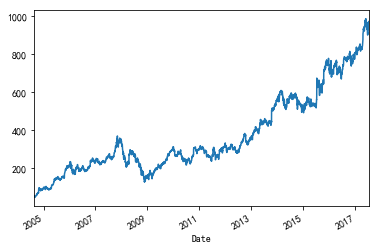

In [257]:
%matplotlib inline
goog["Adj Close"].plot()

In [258]:
goog.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-14,952.000000,956.909973,948.005005,955.989990,955.989990,1053800
2017-07-17,957.000000,960.739990,949.241028,953.419983,953.419983,1165500
2017-07-18,953.000000,968.039978,950.599976,965.400024,965.400024,1154000
2017-07-19,967.840027,973.039978,964.030029,970.890015,970.890015,1224500
2017-07-20,975.000000,975.900024,961.510010,968.150024,968.150024,1616500


### 作图

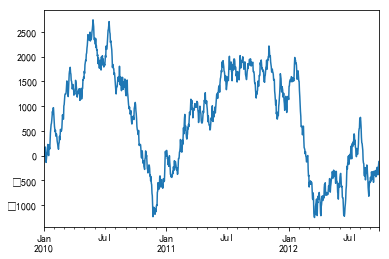

In [259]:
ts = pd.Series(np.random.randn(1000)*100, index=pd.date_range("1/1/2010", periods=1000))
ts = ts.cumsum()
ts.plot()

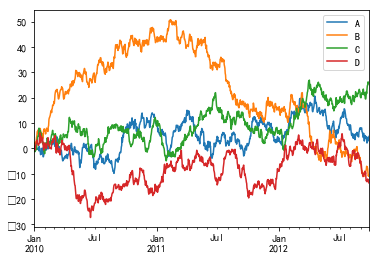

In [260]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
df.plot()

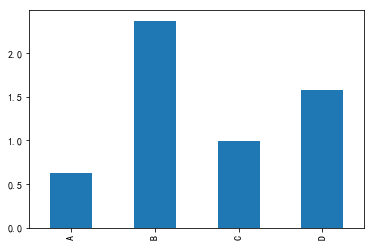

In [261]:
df.iloc[5].plot(kind="bar")

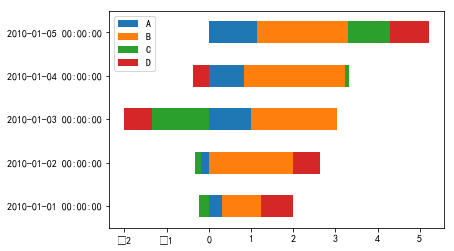

In [262]:
df.head().plot.barh(stacked=True)

In [263]:
df = pd.DataFrame({"apts": apts, "cars": cars})
df

,apts,cars
Beijing,55000.0,300000.0
Chongqing,NaN,150000.0
Guangzhou,40000.0,250000.0
Hangzhou,40000.0,NaN
Shanghai,60000.0,350000.0
Shenzhen,80000.0,300000.0
Suzhou,55000.0,NaN
Tianjian,NaN,200000.0


In [264]:
df.to_csv("data/sample.tsv", sep="\t")

In [265]:
pd.read_csv("data/sample.tsv", sep="\t", index_col=0)

,apts,cars
Beijing,55000.0,300000.0
Chongqing,NaN,150000.0
Guangzhou,40000.0,250000.0
Hangzhou,40000.0,NaN
Shanghai,60000.0,350000.0
Shenzhen,80000.0,300000.0
Suzhou,55000.0,NaN
Tianjian,NaN,200000.0


## 作业

- 构建三个Series，分别是一系列商品的单价，计量单位，和数量。至于是什么商品什么计量单位由大家自己决定。

- 然后把这三个Series合并成一个DataFrame。

- 请同学们自行从yahoo finance下载一些股票数据，然后用read_csv载入并作出折线图

- data文件夹下有个文件叫做titanic.csv ，这个文件包含了在titanic事件中乘客的存货情况。请把这个文件读入成一个pandas dataframe

- 把每一列中的sex，sex为male的都改成1，sex为female的改成0

- 把Cabin中的NaN都填充成0 (使用fillna方法)

- 现在我们想把乘客按照年龄做一个分类，年龄在0-11岁的为0类，12-22为1类，23-33为2类，34-44为3类，45-55为4类，56-66为5类，其余为6类，请做把Age改成乘客的年龄类别，如果年龄有缺失，就放入乘客的平均年龄

我们前面做的这一系列操作都属于数据预处理的范畴。在做实际machine learning问题的时候，很多时候我们都需要对数据进行预处理操作，方便后续的建模。